In [4]:
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
from qiskit import *
import qiskit;from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
%matplotlib inline

In [5]:
%run init.ipynb

/tmp/ipykernel_13817/3460370574.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
/tmp/ipykernel_13817/3460370574.py:18: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


### Distribuição do conteúdo:
* Introdução ao tema do protocolo.
* Cálculos analíticos envolvidos com o protocolo. 
* Planejamento para simulação do protocolo. 
* Execução da simulação, experimento e resultados. 
* Generalizações/extensões do protocolo. 


# Introdução ao tema do protocolo

A comunicação quântica mostrou-se a principal aplicação que pode ser aprimorada utilizando o swap de emaranhamento, por exemplo limitando o número de usuários que podem obter a chave da criptografia, compartilhando o emaranhamento com cada um dos usuários.



![title](Articles/2/1.png)

![title](Articles/2/2.png)

![title](Articles/2/3.png)

__Montar uma introdução baseada nas pastas 1 2 e 3__

![title](Articles/1/1.png)
__Conclusão__
![title](Articles/1/2.png)

# Explicação da implementação do protocolo

O protocolo consiste em consumir dois qubits $(A',B')$ para emaranhar outros dois qubits distantes $(A,B)$, esse protocolo também é conhecido como teleporte de emaranhamento, pois no final temos o qubit A emaranhado com o qubit B.
![title](Avaliações/PresentationPictures/1.png)
 

# Cálculos analíticos e planejamento para simulação do protocolo
    
    

### Eis que surgem os estados de Bell
$$\begin{cases}
|B_{00}\rangle := |\Phi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big), \\
|B_{01}\rangle := |\Psi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle + |10\rangle\big), \\
|B_{10}\rangle := |\Phi_{-}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle - |11\rangle\big), \\
|B_{11}\rangle := |\Psi_{-}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle - |10\rangle\big).
\end{cases}
$$

Vamos supor que o estado composto de $A$ e $A'$ e $B'$ e $B$ são ambos o estado $|\Phi^+\rangle$
$$
\begin{cases}
    &|\Phi^+\rangle_{AA'} = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)\\
    &|\Phi^+\rangle_{B'B} = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)\\
\end{cases}
$$
A ideia do protocolo é que a Carla vai ter dois estados, um estado emaranhado com a Alice e um outro emaranhado com o Bob. E quando a Carla faz uma medida na base de Bell, o estado restante entre a Alice o Bob serão um par de Bell.

Com isso o estado total do sistema é :
$$
|\Phi^+\rangle_{AA'}\otimes|\Phi^+\rangle_{B'B} = \frac{1}{2}\left(|0000\rangle+|1100\rangle+|0011\rangle+|1111\rangle\right)
$$

Agora vamos utilizar as seguintes identidades para reescrever os qubits de dentro pelas identidades:
$$
\begin{cases}
    &|00\rangle =\left(|\Phi^+\rangle+|\Phi^-\rangle\right)\frac{1}{\sqrt{2}}\\
    &|01\rangle =\left(|\Psi^+\rangle+|\Psi^-\rangle\right)\frac{1}{\sqrt{2}}\\
    &|10\rangle =\left(|\Psi^+\rangle-|\Psi^-\rangle\right)\frac{1}{\sqrt{2}}\\
    &|11\rangle =\left(|\Phi^+\rangle-|\Phi^-\rangle\right)\frac{1}{\sqrt{2}}\\
\end{cases}
$$

$$
|\Phi^+\Phi^+\rangle_{AA'B'B} = \frac{1}{2\sqrt{2}}\begin{cases}&|0\rangle\left(|\Phi^+\rangle+|\Phi^-\rangle\right)0\rangle+\\&+|1\rangle\left(|\Psi^+\rangle-|\Psi^-\rangle\right)0\rangle\\&+|0\rangle\left(|\Psi^+\rangle+|\Psi^-\rangle\right)1\rangle\\&+|1\rangle\left(|\Phi^+\rangle-|\Phi^-\rangle\right)1\rangle\\
\end{cases}
$$
Aqui, o produto entre vetores é o produto tensorial

$$
|\Phi^+\Phi^+\rangle = \frac{1}{2\sqrt{2}}\begin{cases}&|\Phi^+\rangle\left(|00\rangle+|11\rangle\right)\\&+|\Phi^-\rangle\left(|00\rangle-|11\rangle\right)\\&+|\Psi^+\rangle\left(|01\rangle+|10\rangle\right)\\&+|\Psi^-\rangle\left(|01\rangle-|10\rangle\right)\end{cases}
$$

__Medida na base de Bell__

$$Pr(|\Phi^+\rangle , |\Phi^+\Phi^+\rangle) = |\langle \Phi^+|\Phi^+\Phi^+\rangle|^2$$

$$Pr(|\Phi^-\rangle , |\Phi^+\Phi^+\rangle) = |\langle \Phi^-|\Phi^+\Phi^+\rangle|^2
$$
$$Pr(|\Psi^+\rangle , |\Phi^+\Phi^+\rangle) = |\langle \Psi^+|\Phi^+\Phi^+\rangle|^2
$$
$$Pr(|\Psi^-\rangle , |\Phi^+\Phi^+\rangle) = |\langle \Psi^-|\Phi^+\Phi^+\rangle|^2
$$

Nesse ponto é importante perceber que ao realizar uma medida na base de bell, o estado depois da medida depende do resultado que foi obtido. Se o resultado da medida for o estado $|\Phi^+\rangle$ significa que o estado composto por $A$ e $B$ é o estado:
$$\frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)
$$

__Ou seja__
* $$\text{Se for medido }|\Phi^+\rangle \rightarrow{}|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)\quad\checkmark $$

* $$\text{Se for medido }|\Phi^-\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)\quad\text{(i)}$$

* $$\text{Se for medido }|\Psi^+\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)\quad\text{(ii)}$$

* $$\text{Se for medido }|\Psi^-\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)\quad\text{(iii)}$$



__Por exemplo__
* $$\text{Se for medido }|\Phi^+\rangle \rightarrow{}|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)\quad\checkmark\quad\text{Nenhuma necessária} $$


* $$\text{Se for medido }|\Phi^-\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)$$
$$\text{Aplicaremos a porta Z}$$
$$|\Phi^-\rangle \rightarrow{}Z|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}Z\left(|00\rangle-|11\rangle\right) = |\Phi^+\rangle$$

* $$\text{Se for medido }|\Psi^+\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)$$
$$\text{Aplicaremos a porta X}$$
$$|\Psi^+\rangle \rightarrow{}X|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}X\left(|01\rangle+|10\rangle\right) = |\Phi^+\rangle$$

* $$\text{Se for medido }|\Psi^-\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$$
$$\text{Aplicaremos a porta X e a Z}$$
$$|\Phi^-\rangle \rightarrow{}ZX|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}ZX\left(|01\rangle-|10\rangle\right) = |\Phi^+\rangle$$

__Resumidamente__
* $$\text{Se for medido }|\Phi^+\rangle \rightarrow{}|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)\quad\checkmark $$

* $$\text{Se for medido }|\Phi^-\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)\rightarrow{}Z|\psi\rangle_{AB}=|\Phi^+\rangle\quad\checkmark$$

* $$\text{Se for medido }|\Psi^+\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)\rightarrow{}X|\psi\rangle_{AB}=|\Phi^+\rangle\quad\checkmark$$

* $$\text{Se for medido }|\Psi^-\rangle \rightarrow{}|\psi\rangle_{AB} =\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)\rightarrow{}XZ|\psi\rangle_{AB}=|\Phi^+\rangle\quad\checkmark$$



$$\begin{cases}
|B_{00}\rangle := |\Phi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big), \\
|B_{01}\rangle := |\Psi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle + |10\rangle\big), \\
|B_{10}\rangle := |\Phi_{-}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle - |11\rangle\big), \\
|B_{11}\rangle := |\Psi_{-}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle - |10\rangle\big).
\end{cases}
$$

O algorítmo torna possível que sejam criados pares de estados de Bell maximamente emaranhados entre qubits que estão distantes, ao preço de utilizar dois qubits auxiliares.

* A fidelidade é reduzida.
* Devemos fazer a purificação do estado após executar o protocolo.

Vamos então criar um circuito de 4 qubits que represente esse estado abaixo:

$$
|\Phi^+\rangle_{AA'}\otimes|\Phi^+\rangle_{B'B} = \frac{1}{2}\left(|0000\rangle+|1100\rangle+|0011\rangle+|1111\rangle\right)
$$

In [8]:
qr = QuantumRegister(4);cr = ClassicalRegister(2);qc = QuantumCircuit(qr,cr)
qc.h(0);qc.cx(0,1);qc.h(2);qc.cx(2,3)

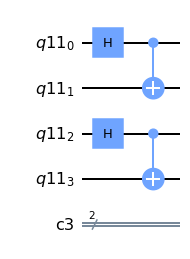

In [9]:
qc.draw(output='mpl')

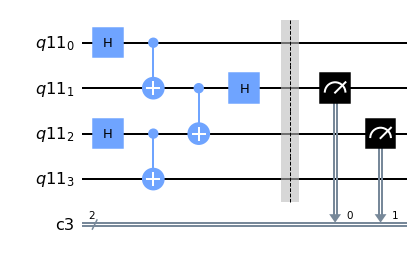

In [10]:
circuit_with_results=qc;qc.cx(1,2);qc.h(1);qc.barrier();circuit_with_results.measure([1,2],[0,1])
circuit_with_results.draw(output='mpl')

{'01': 237, '00': 259, '11': 236, '10': 268}


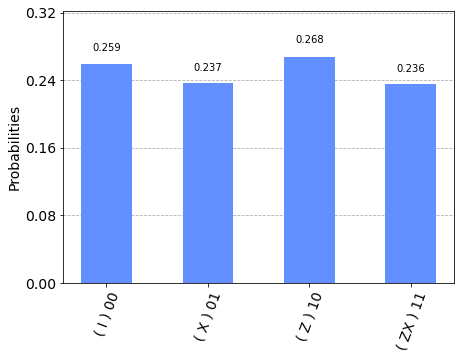

In [11]:
backend = BasicAer.get_backend('qasm_simulator');result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);counts2={};print(counts)
for i in counts:
    if i =='00':
        counts2[' ( I ) 00']=counts[i]
    if i =='01':
        counts2[' ( X ) 01']=counts[i]
    if i =='10':
        counts2[' ( Z ) 10']=counts[i]
    if i =='11':
        counts2[' ( ZX ) 11']=counts[i]
plot_histogram(counts2)

Então ao invés de executar a medida nesses qubits vamos utilizar as portas $cx$ e $cz$ para alterar o estado final do Bob. Aqui vale ressaltar que poderiamos executar o algorítmo para aplicar as portas controladas no estado da Alice.

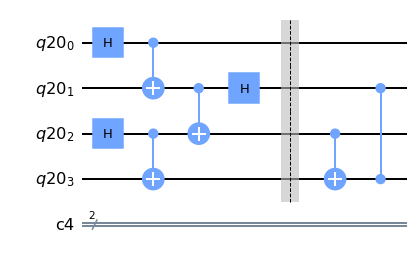

In [12]:
qr = QuantumRegister(4);cr = ClassicalRegister(2);qc = QuantumCircuit(qr,cr);qc.h(0);qc.cx(0,1)
qc.h(2);qc.cx(2,3);qc.cx(1,2);qc.h(1);qc.barrier();qc.cx(2,3);qc.cz(1,3);qc.draw(output='mpl')

Esse circuito implementa o swap de emaranhamento, cria um par emaranhado entre o qubit 0 e o qubit 3, ou seja,  faz o teleport do emaranhamento para o qubit 3.

# Execução da simulação, experimento e resultados

    

### Load accout

In [13]:
import qiskit
from qiskit.tools.monitor import backend_overview, backend_monitor
qiskit.IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de', 
                  overwrite = True)
qiskit.IBMQ.load_account();

### Define o device

In [15]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
simulator = provider.get_backend('ibmq_qasm_simulator')
device = provider.get_backend('ibmq_lima')#ibmq_belem')

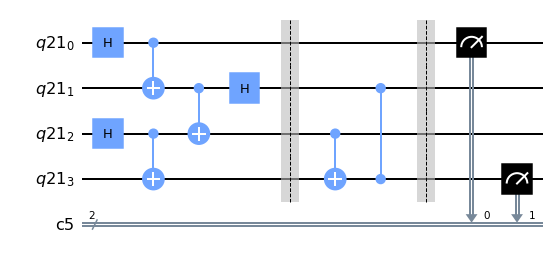

In [16]:
qr = QuantumRegister(4);cr = ClassicalRegister(2);qc = QuantumCircuit(qr,cr);qc.h(0);qc.cx(0,1);qc.h(2);qc.cx(2,3);qc.cx(1,2);qc.h(1)
qc.barrier();qc.cx(2,3);qc.cz(1,3);circuit_with_results=qc;qc.barrier();circuit_with_results.measure([0,3],[0,1])
circuit_with_results.draw(output='mpl')

{'00': 523, '11': 477}


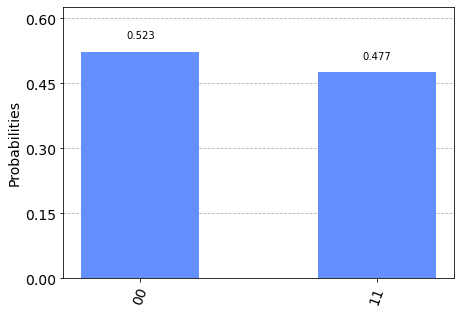

In [17]:
backend = BasicAer.get_backend('qasm_simulator');result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)

In [19]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')#'ibmq_lima')#'ibmq_belem')
job=execute(circuit_with_results,backend=device,shots = 8192)
job_monitor(job)

Job Status: job has successfully run


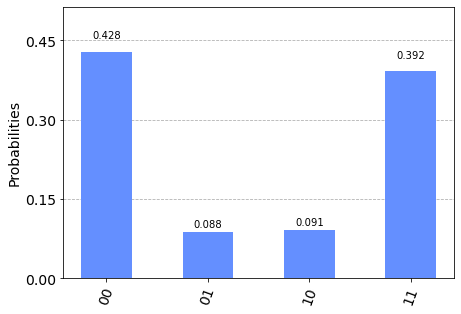

In [20]:
result = job.result()
plot_histogram(result.get_counts(circuit_with_results))

In [23]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
''' realiza tomografia e plota o estado qr[0]'''
qstc = state_tomography_circuits(qc, [qr[0],qr[3]]);
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

/tmp/ipykernel_13817/1062668552.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
/home/v/anaconda3/lib/python3.9/site-packages/qiskit/ignis/verification/tomography/fitters/base_fitter.py:348: RuntimeWarning: invalid value encountered in true_divide
  probs = np.array(cts) / shots


ValueError: array must not contain infs or NaNs

/tmp/ipykernel_13817/3365267943.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float)


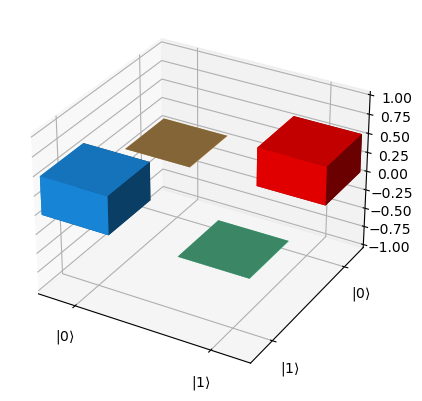

In [24]:
''' realiza tomografia e plota o estado qr[3]'''
qstc = state_tomography_circuits(qc, qr[3])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots);
qstf = StateTomographyFitter(job.result(), qstc);
rho = qstf.fit(method='lstsq');
plot_rho1qb(rho);

E se executarmos a medida na base de Bell temos:

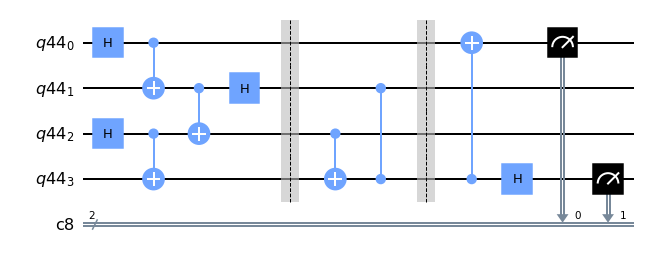

In [25]:
qr = QuantumRegister(4);cr = ClassicalRegister(2);qc = QuantumCircuit(qr,cr)
qc.h(0);qc.cx(0,1);qc.h(2);qc.cx(2,3);qc.cx(1,2);qc.h(1);qc.barrier();qc.cx(2,3);qc.cz(1,3);qc.barrier()
qc.cx(3,0);qc.h(3);circuit_with_results=qc;circuit_with_results.measure([0,3],[0,1]);qc.draw(output='mpl')

{'00': 1000}


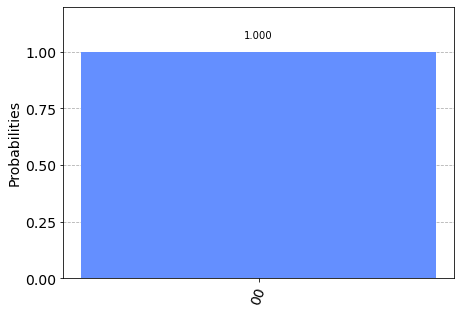

In [32]:
backend = BasicAer.get_backend('qasm_simulator');result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)

In [16]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_lima')#'ibmq_belem')
job=execute(circuit_with_results,backend=device,shots = 8192);job_monitor(job)

Job Status: job has successfully run


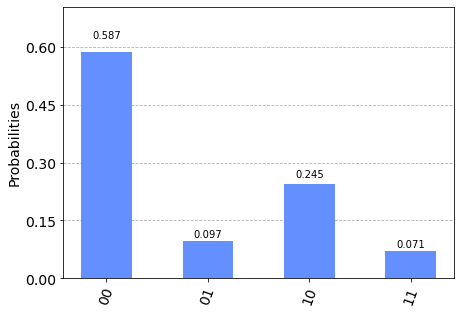

In [17]:
result = job.result()
plot_histogram(result.get_counts(circuit_with_results))

/tmp/ipykernel_20338/3365267943.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float)


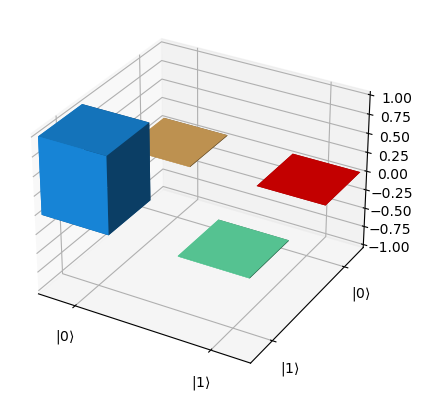

In [37]:
''' realiza tomografia e plota o estado qr[0]'''
qstc = state_tomography_circuits(qc, qr[0])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

/tmp/ipykernel_20338/3365267943.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float)


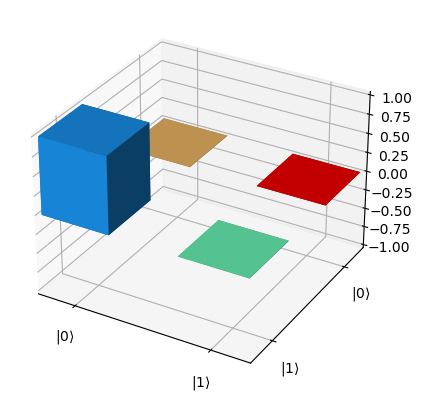

In [36]:
''' realiza tomografia e plota o estado qr[3]'''
qstc = state_tomography_circuits(qc, qr[3])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

# Generalizações/extensões do protocolo

    

## Tentativa de teletransportar o emaranhamento usando 7 qubits


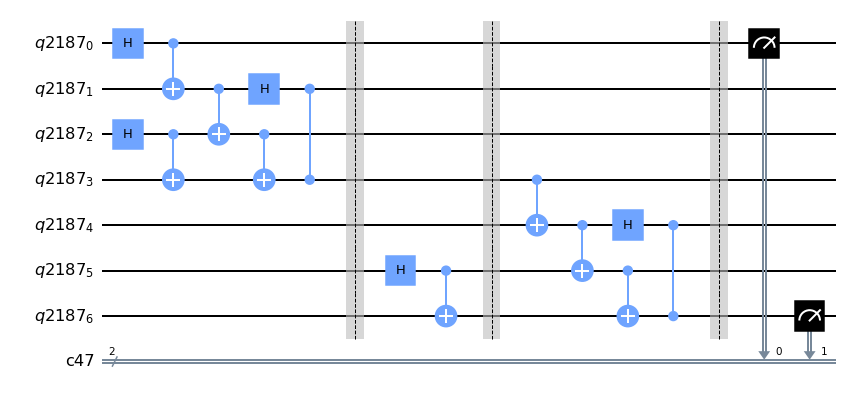

In [61]:
qc = QuantumCircuit(qr,cr);qr = QuantumRegister(7);cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr);qc.h(0);qc.cx(0,1);qc.h(2);qc.cx(2,3);qc.cx(1,2)
qc.h(1);qc.cx(2,3);qc.cz(1,3);qc.barrier();qc.h(5);qc.cx(5,6);qc.barrier()
qc.cx(3,4);qc.cx(4,5);qc.h(4);qc.cx(5,6);qc.cz(4,6);qc.barrier()
circuit_with_results=qc;circuit_with_results.measure([0,6],[0,1])
circuit_with_results.draw(output='mpl')

{'00': 503, '11': 497}


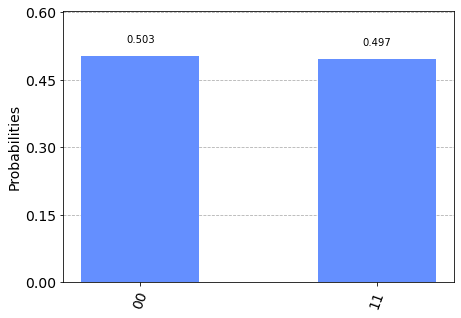

In [29]:
backend = BasicAer.get_backend('qasm_simulator');result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)

In [20]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_lima')#'ibmq_belem')
job=execute(circuit_with_results,backend=device,shots = 8192);job_monitor(job)

TranspilerError: 'Number of qubits (7) in circuit-268 is greater than maximum (5) in the coupling_map'

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit_with_results))

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


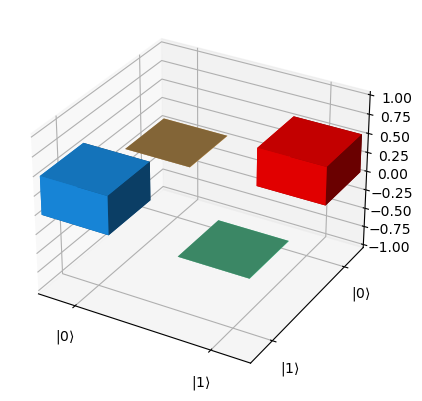

In [62]:
''' realiza tomografia e plota o estado qr[0]'''
qstc = state_tomography_circuits(qc, qr[0])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


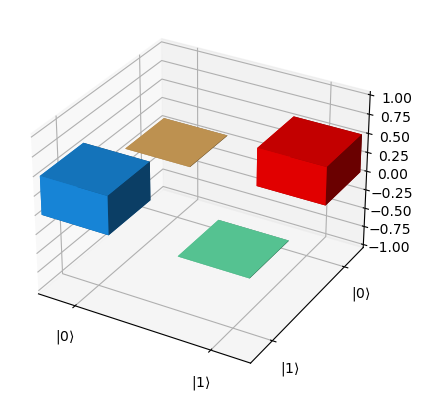

In [63]:
''' realiza tomografia e plota o estado qr[6]'''
qstc = state_tomography_circuits(qc, qr[6])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

## Tentativa de teletransporte de emaranhamento usando 7 qubits

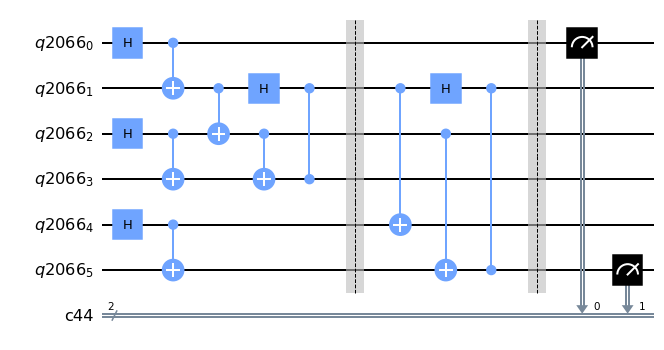

In [58]:
''' Este circuito não funcionou, mas a ideia era reutilizar os qubits que são usados como controle'''
qc = QuantumCircuit(qr,cr)
qr = QuantumRegister(6)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.cx(2,3)
qc.cz(1,3)
qc.h(4)
qc.cx(4,5)
qc.barrier()
qc.cx(1,4)
qc.h(1)
qc.cx(2,5)
qc.cz(1,5)
qc.barrier()
circuit_with_results=qc
circuit_with_results.measure([0,5],[0,1])
circuit_with_results.draw(output='mpl')

{'10': 243, '11': 249, '01': 268, '00': 240}


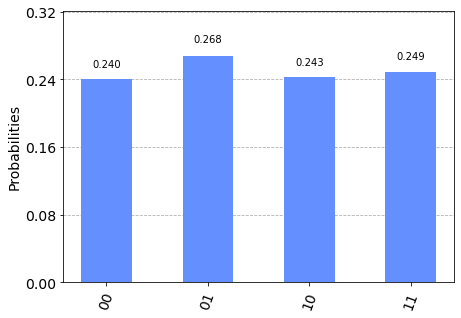

In [ ]:
''' Medindo no simulador'''
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


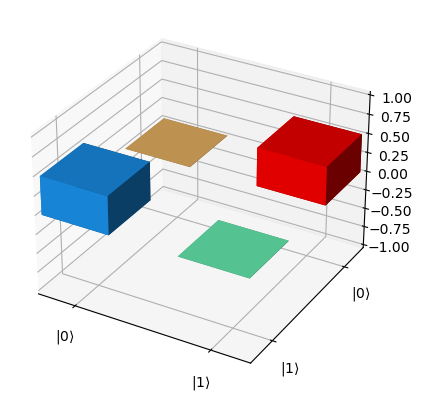

In [59]:
''' realiza tomografia e plota o estado qr[0]'''
qstc = state_tomography_circuits(qc, qr[0])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


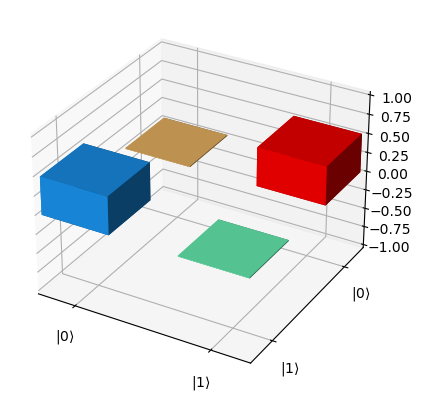

In [60]:
''' realiza tomografia e plota o estado qr[5]'''
qstc = state_tomography_circuits(qc, qr[5])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

## Swap de emaranhamento usando 6 qubits

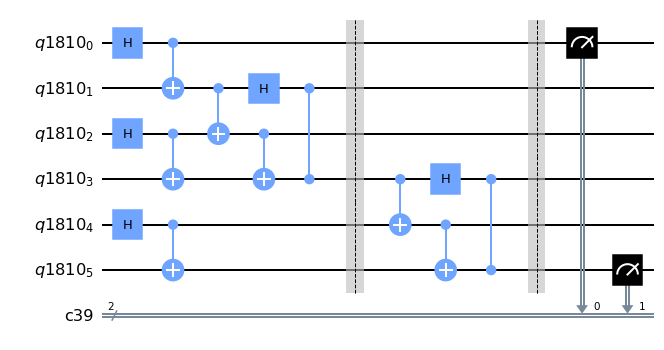

In [52]:
''' Usando 6 qubits'''
qr = QuantumRegister(6);cr = ClassicalRegister(2);qc = QuantumCircuit(qr,cr);qc = QuantumCircuit(qr,cr)
qc.h(0);qc.cx(0,1);qc.h(2);qc.cx(2,3);qc.cx(1,2);qc.h(1);qc.cx(2,3);qc.cz(1,3);qc.h(4);qc.cx(4,5)
qc.barrier();qc.cx(3,4);qc.h(3);qc.cx(4,5);qc.cz(3,5);qc.barrier();circuit_with_results=qc
circuit_with_results.measure([0,5],[0,1]);circuit_with_results.draw(output='mpl')

{'11': 507, '00': 493}


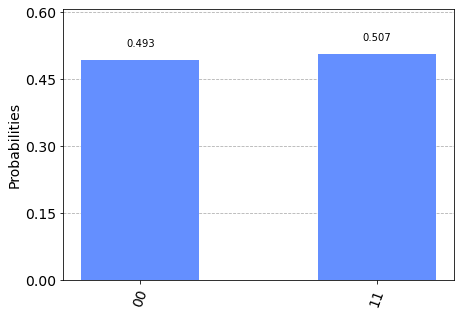

In [53]:
'''Medindo no simulador'''
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


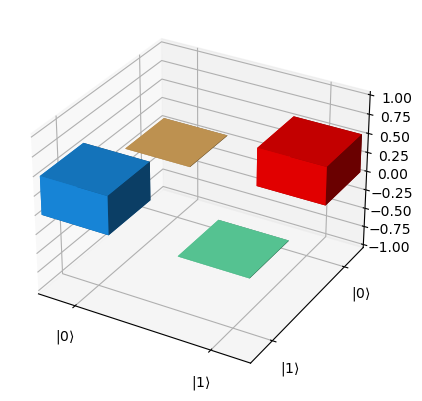

In [54]:
''' realiza tomografia e plota o estado qr[0]'''
qstc = state_tomography_circuits(qc, qr[0])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


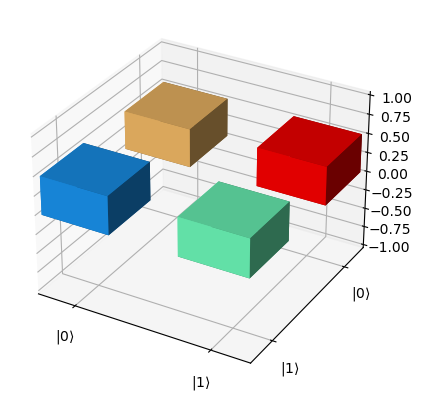

In [55]:
''' realiza tomografia e plota o estado qr[3]'''
qstc = state_tomography_circuits(qc, qr[3])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

/tmp/ipykernel_20338/1672297567.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  result = np.array(result, dtype=float);


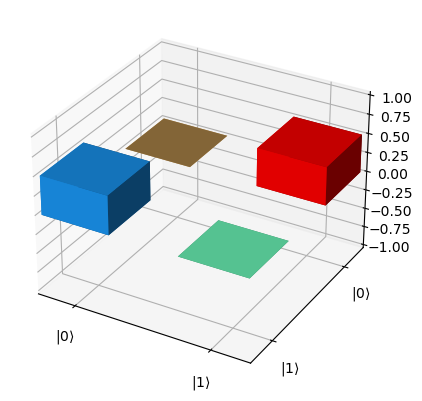

In [56]:
''' realiza tomografia e plota o estado qr[5]'''
qstc = state_tomography_circuits(qc, qr[5])
nshots = 8192
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho)

In [ ]:
'''Medindo no computador da IBM'''
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_lima')#'ibmq_belem')
job=execute(circuit_with_results,backend=device,shots = 8192)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

TranspilerError: 'Number of qubits (6) in circuit-376 is greater than maximum (5) in the coupling_map'

In [ ]:
''' Mostra o Histograma'''
result = job.result()
plot_histogram(result.get_counts(circuit_with_results))

## Exercício de aula: Realizar o swap de emaranhamento usando estados GHZ

$$|GHZ \rangle = \frac{|00...0\rangle + |11...1\rangle}{\sqrt{2}} \equiv \frac{|0 \rangle ^{\otimes n} + |1 \rangle ^{\otimes n}}{\sqrt{2}}\quad\quad |\quad n=3
$$

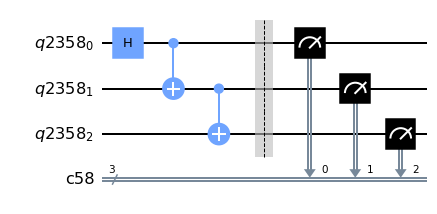

In [75]:
qr = QuantumRegister(3);cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr);qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.barrier()
circuit_with_results=qc
circuit_with_results.measure([0,1,2],[0,1,2])
circuit_with_results.draw(output='mpl')

{'000': 518, '111': 482}


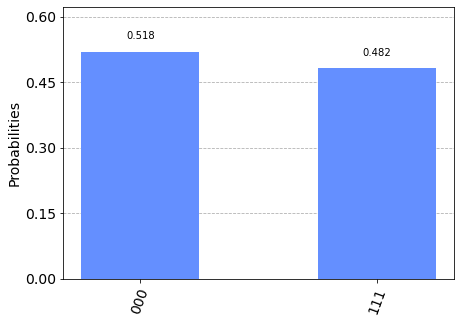

In [76]:
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)

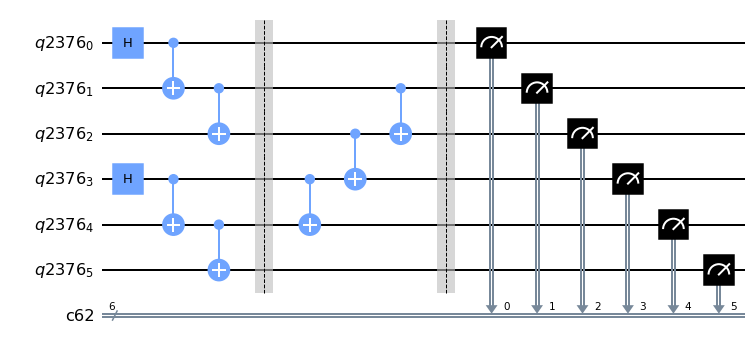

In [80]:
qr = QuantumRegister(6);cr = ClassicalRegister(6)
qc = QuantumCircuit(qr,cr);qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.h(3)
qc.cx(3,4)
qc.cx(4,5)
#qc.h(2)
#qc.cx(2,3)
#qc.cx(1,2)
#qc.h(1)
#qc.cx(2,3)
#qc.cz(1,3)
#qc.h(4)
#qc.cx(4,5)
#qc.barrier()
#qc.cx(3,4)
#qc.h(3)
#qc.cx(4,5)
#qc.cz(3,5)
qc.barrier()
qc.cx(3,4)
qc.cx(2,3)
qc.cx(1,2)
qc.barrier()
circuit_with_results=qc
circuit_with_results.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit_with_results.draw(output='mpl')

{'000000': 238, '100011': 260, '101000': 275, '001011': 227}


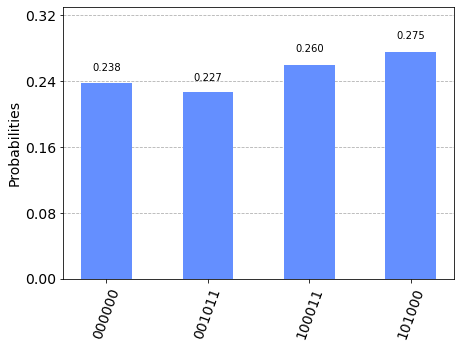

In [81]:
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results);print(counts);plot_histogram(counts)